# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [6]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet(r"C:\Users\Srinivasan\EDDSAI\NYC taxi data\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
data_dir = r"C:\Users\Srinivasan\EDDSAI\NYC taxi data\Datasets and Dictionary\trip_records"
os.chdir(data_dir)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month["pickup_date"] = df_month["tpep_pickup_datetime"].dt.date
        df_month["pickup_hour"] = df_month["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through each date
        for date in df_month["pickup_date"].unique():
            date_data = df_month[df_month["pickup_date"] == date]

            # Loop through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data["pickup_hour"] == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Processed {file_name} with {sampled_data.shape[0]} rows sampled.")
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processed 2023-1.parquet with 152087 rows sampled.
Processed 2023-10.parquet with 174255 rows sampled.
Processed 2023-11.parquet with 165133 rows sampled.
Processed 2023-12.parquet with 166709 rows sampled.
Processed 2023-2.parquet with 168696 rows sampled.
Processed 2023-3.parquet with 163786 rows sampled.
Processed 2023-4.parquet with 139641 rows sampled.
Processed 2023-5.parquet with 144458 rows sampled.
Processed 2023-6.parquet with 162910 rows sampled.
Processed 2023-7.parquet with 174068 rows sampled.
Processed 2023-8.parquet with 143782 rows sampled.
Processed 2023-9.parquet with 140875 rows sampled.
Error reading file df_final: 'tpep_pickup_datetime'


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df = df.sample(n=300000, random_state=42) if len(df) > 300000 else df
df.to_parquet(r"C:\Users\Srinivasan\EDDSAI\sampled_data.parquet", engine="pyarrow", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file
df=pd.read_parquet(r"C:\Users\Srinivasan\EDDSAI\sampled_data.parquet", engine="pyarrow")

In [17]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.50          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       10.00          6.55   
3             1  ...      0.5        5.46          0.00   
4             1  ...      0.5        3.58          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         27.50                   2.5          NaN   
1                    1.0         14.00                   2.5          0.0   
2                    1.0         89.30                   0.0          NaN   
3                    1.0         32.76                   2.5          NaN   
4                    1.0         21.48                   2.5          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-04-21            1        0.00  
1   2023-01-10           14         NaN  
2   2023-02-04           15        1.25  
3   2023-03-24           12        0.00  
4   2023-09-05           17        0.00  

[5 rows x 22 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.90         1.0                  N           239           236   
1           1.86         1.0                  N           239           162   
2           0.50         1.0                  N           162           170   
3           2.56         1.0                  N           162           262   
4           2.80         1.0                  N           164           231   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         13.5    2.5      0.5        2.50           0.0   
1             1         14.2    0.0      0.5        3.64           0.0   
2             1          5.1    1.0      0.5        2.02           0.0   
3             1         17.0    2.5      0.5        4.70           0.0   
4             1         14.9    3.5      0.5        3.98           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         20.00                   2.5          0.0  
1                    1.0         21.84                   2.5          0.0  
2                    1.0         12.12                   2.5          0.0  
3                    1.0         28.20                   2.5          0.0  
4                    1.0         23.88                   2.5          0.0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [138]:
# Combine the two airport fee columns
df["airport_fee_total"] = df["airport_fee"].fillna(0) + df["Airport_fee"].fillna(0)
print(df[["airport_fee", "Airport_fee", "airport_fee_total"]].head())

   airport_fee  Airport_fee  airport_fee_total
0          NaN         0.00               0.00
1          0.0          NaN               0.00
2          NaN         1.25               1.25
3          NaN         0.00               0.00
4          NaN         0.00               0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [232]:
# check where values of fare amount are negative
negative_count = (df["fare_amount"] < 0).sum()
total_count = len(df)
negative_value = (negative_count / total_count) * 100
print(f"Negative value: {negative_count} ({negative_percentage:.2f}%)")

Negative value: 0 (0.00%)


Did you notice something different in the `RatecodeID` column for above records?

In [39]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = df[df["fare_amount"] < 0]
print(negative_fare_df["RatecodeID"].value_counts())

Series([], Name: count, dtype: int64)


In [41]:
# Find which columns have negative values
negative_cols = negative_fare_df.select_dtypes(include=['number']).apply(lambda columns: (columns < 0).any())
print("Columns have negative values:", negative_cols[negative_cols].index.tolist())

Columns have negative values: []


In [43]:
# fix these negative values
negative_fare_df1 = negative_fare_df[negative_fare_df["fare_amount"] >= 0]
print(negative_fare_df1)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [9]:
# Find the proportion of missing values in each column
df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          7023
trip_distance               0
RatecodeID               7023
store_and_fwd_flag       7023
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     7023
airport_fee              7023
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [172]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.passenger_count.isnull().sum()
df.passenger_count.fillna(df.passenger_count, inplace=True) 
print(df.passenger_count.value_counts(normalize=True))

passenger_count
1.0    0.760230
2.0    0.146460
3.0    0.036313
4.0    0.020433
0.0    0.015450
5.0    0.012830
6.0    0.008280
8.0    0.000003
Name: proportion, dtype: float64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [204]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

10223

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [27]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].fillna(np.NaN, inplace=True)
df["congestion_surcharge"].head()

0    2.5
1    2.5
2    2.5
3    2.5
4    2.5
Name: congestion_surcharge, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [218]:
# Handle any remaining missing values
print(df["congestion_surcharge"].isnull().sum())

0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [49]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.726070  2023-01-17 00:32:40.376147  2023-01-17 00:48:17.698963   
min         1.000000         2022-10-25 00:59:02         2022-10-25 01:09:02   
25%         1.000000  2023-01-09 16:05:27.250000  2023-01-09 16:21:04.250000   
50%         2.000000  2023-01-17 09:01:24.500000         2023-01-17 09:16:18   
75%         2.000000  2023-01-24 16:45:33.250000  2023-01-24 17:00:48.250000   
max         2.000000         2023-02-01 00:00:20         2023-02-01 17:19:45   
std         0.445974                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count     292977.00000  300000.000000  292977.000000  300000.000000   
mean           1.36265       3.701751       1.519583     166.609020   
min            0.00000       0.000000       1.000000       1.000000   
25%            1.00000       1.070000       1.000000     132.000000   
50%            1.00000       1.800000       1.000000     162.000000   
75%            1.00000       3.330000       1.000000     234.000000   
max            8.00000   52042.300000      99.000000     265.000000   
std            0.89898     100.808759       6.645192      64.234117   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.387073       1.176643      18.653319       1.562521   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       8.600000       0.000000   
50%       162.000000       1.000000      12.800000       1.000000   
75%       234.000000       1.000000      20.500000       2.500000   
max       265.000000       4.000000     656.800000      11.250000   
std        69.971811       0.488243      17.363057       1.779843   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.496298       3.401570       0.528632               0.998258   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.760000       0.000000               1.000000   
75%         0.500000       4.200000       0.000000               1.000000   
max         0.800000     117.000000      65.000000               1.000000   
std         0.043955       3.829525       2.020166               0.038342   

        total_amount  congestion_surcharge    airport_fee  
count  300000.000000         292977.000000  292977.000000  
mean       27.425705              2.309618       0.109625  
min        -4.000000             -2.500000      -1.250000  
25%        15.480000              2.500000       0.000000  
50%        20.160000              2.500000       0.000000  
75%        28.850000              2.500000       0.000000  
max       667.100000              2.500000       1.250000  
std        21.619974              0.663364       0.353633

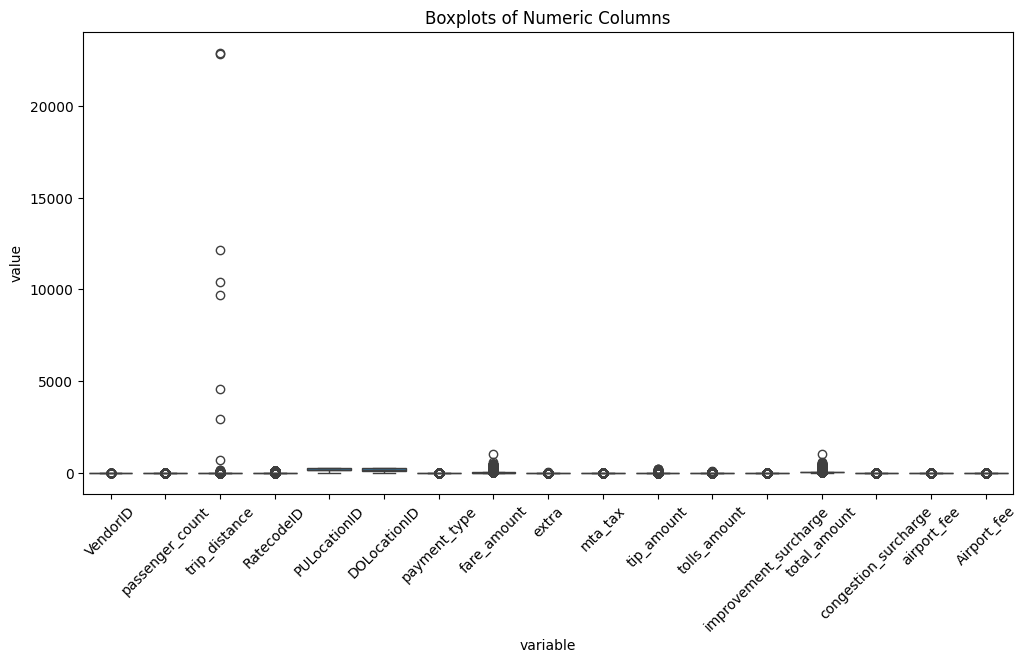

In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Reshape for Seaborn
df_melted = df.melt(value_vars=numeric_columns)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted,x='variable', y='value')
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.show()







**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [25]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        5.50          0.00                    1.0   
1             2  ...        0.00          0.00                    1.0   
2             1  ...       10.00          6.55                    1.0   
3             1  ...        5.46          0.00                    1.0   
4             1  ...        3.58          0.00                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date  pickup_hour  \
0         27.50                   2.5          NaN   2023-04-21            1   
1         14.00                   2.5          0.0   2023-01-10           14   
2         89.30                   0.0          NaN   2023-02-04           15   
3         32.76                   2.5          NaN   2023-03-24           12   
4         21.48                   2.5          NaN   2023-09-05           17   

   Airport_fee airport_fee_total  
0         0.00              0.00  
1          NaN              0.00  
2         1.25              1.25  
3         0.00              0.00  
4         0.00              0.00  

[5 rows x 23 columns]

In [19]:
# Continue with outlier handling
df = df[~((df["trip_distance"] <= 0.1) & (df["fare_amount"] > 300))]
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & 
          (df["tpep_pickup_datetime"] != df["tpep_dropoff_datetime"]))]
df = df[df["trip_distance"] <= 250]
df = df[df["payment_type"] != 0]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1              2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2              2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3              2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4              1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-01-12 16:03:17   2023-01-12 16:18:37              2.0   
299996         2  2023-01-07 18:41:42   2023-01-07 18:44:23              2.0   
299997         2  2023-01-22 19:30:25   2023-01-22 19:42:11              1.0   
299998         2  2023-01-24 14:24:00   2023-01-24 14:46:01              1.0   
299999         2  2023-01-03 08:57:41   2023-01-03 09:08:03              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                1.90         1.0                  N           239   
1                1.86         1.0                  N           239   
2                0.50         1.0                  N           162   
3                2.56         1.0                  N           162   
4                2.80         1.0                  N           164   
...               ...         ...                ...           ...   
299995           1.77         1.0                  N           163   
299996           0.37         1.0                  N           239   
299997           2.00         1.0                  N           100   
299998           3.41         1.0                  N           166   
299999           1.87         1.0                  N           263   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                236             1         13.5    2.5      0.5        2.50   
1                162             1         14.2    0.0      0.5        3.64   
2                170             1          5.1    1.0      0.5        2.02   
3                262             1         17.0    2.5      0.5        4.70   
4                231             1         14.9    3.5      0.5        3.98   
...              ...           ...          ...    ...      ...         ...   
299995           236             1         14.9    2.5      0.5        4.28   
299996           239             1          5.1    0.0      0.5        1.82   
299997           229             2         12.8    0.0      0.5        0.00   
299998           143             2         21.9    0.0      0.5        0.00   
299999           162             1         11.4    0.0      0.5        3.08   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         20.00   
1                0.0                    1.0         21.84   
2                0.0                    1.0         12.12   
3                0.0                    1.0         28.20   
4                0.0                    1.0         23.88   
...              ...                    ...           ...   
299995           0.0                    1.0         25.68   
299996           0.0                    1.0         10.92   
299997           0.0                    1.0         16.80   
299998           0.0                    1.0         25.90   
299999           0.0                    1.0         18.48   

        congestion_surcharge  airport_fee  
0                        2.5          0.0  
1                        2.5          0.0  
2                        2.5          0.0  
3                        2.5          0.0  
4                        2.5          0.0  
...                      ...          ...  
299995                   2.5          0.0  
299996                   2.5          0.0  
299997                   2.5          0.0  
299998                   2.5          0.0  
299999                   2.5          0.

In [23]:
# Do any columns need standardising?
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%Y-%m-%d %H:%M:%S")
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())


  tpep_pickup_datetime tpep_dropoff_datetime
0  2023-01-05 07:50:08   2023-01-05 08:02:04
1  2023-01-17 07:47:24   2023-01-17 08:00:50
2  2023-01-25 21:57:59   2023-01-25 22:00:33
3  2023-01-09 19:36:54   2023-01-09 19:52:01
4  2023-01-11 22:19:13   2023-01-11 22:32:37


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [41]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'Airport_fee',
 'airport_fee_total']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
VendorID:Numerical
tpep_pickup_datetime:Numerical
tpep_dropoff_datetime:Numerical
passenger_count:Numerical
trip_distance:Numerical
RatecodeID:Numerical
PULocationID:Numerical
DOLocationID:Numerical
payment_type:Numerical
pickup_hour:Numerical
trip_duration:Numerical

fare_amount:Numerical
extra:Numerical
mta_tax:Numerical
tip_amount:Numerical
tolls_amount:Numerical
improvement_surcharge:Numerical
total_amount:Numerical
congestion_surcharge:Numerical
airport_fee:Numerical


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [97]:
# Find and show the hourly trends in taxi pickups
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
hourly_trends = df.groupby('pickup_hour')['PULocationID'].count()

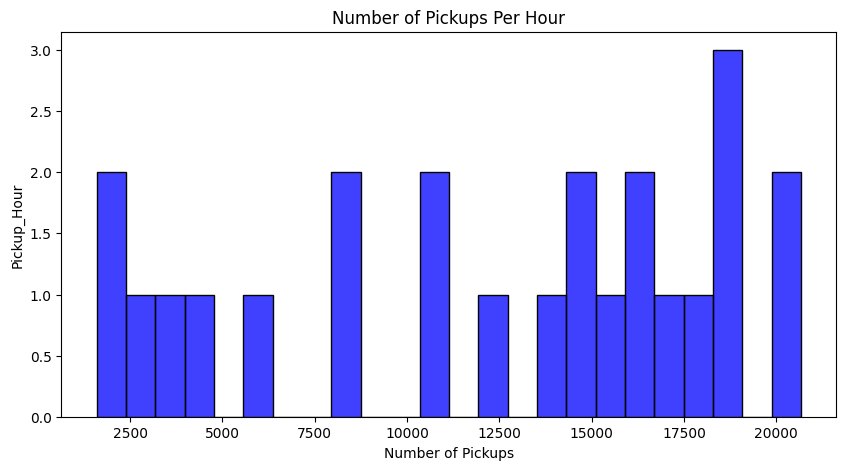

In [99]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10, 5))
sns.histplot(hourly_trends, bins=24, color="Blue", edgecolor="Black")
plt.xlabel("Number of Pickups")
plt.ylabel("Pickup_Hour")
plt.title("Number of Pickups Per Hour")
plt.xticks(rotation=0)  # Ensures labels for all hours
plt.show()


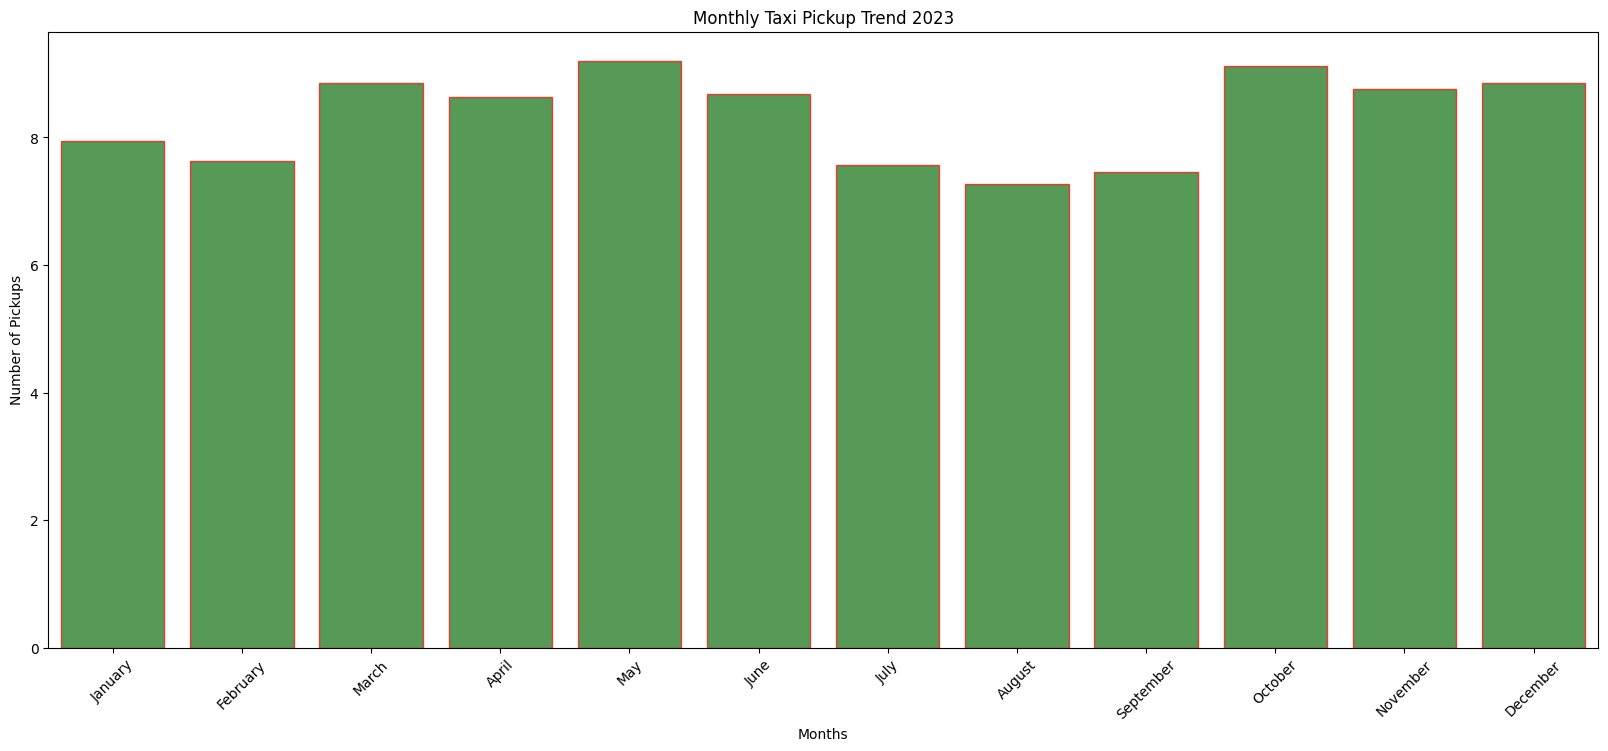

In [33]:
# Show the monthly trends in pickups
monthly_trends = df['tpep_pickup_datetime'].dt.month_name().value_counts(normalize = True) *100
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trends = monthly_trends.reindex(month_order)
plt.figure(figsize=(20, 8))
b2 = sns.barplot( x = monthly_trends.index , y = monthly_trends.values , color = 'green', edgecolor = 'red' , alpha =0.7 )
plt.title('Monthly Taxi Pickup Trend 2023')
plt.xlabel('Months')
plt.ylabel('Number of Pickups')
plt.xticks(rotation = 45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [39]:
# Analyse the above parameters
# Check for zero and negative values
columns_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zero values, {negative_count} negative values")

fare_amount: 108 zero values, 0 negative values
tip_amount: 69187 zero values, 0 negative values
total_amount: 52 zero values, 16 negative values
trip_distance: 5860 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

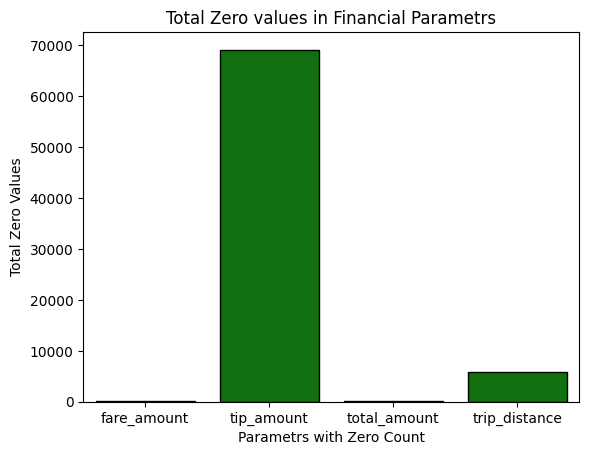

In [45]:
# Create a df with non zero entries for the selected parameters.
zero_count = df[['fare_amount','tip_amount','total_amount','trip_distance']].apply(lambda x : (x==0).sum())
b3 = sns.barplot( x= zero_count.index, y = zero_count.values, color='Green',edgecolor='Black')
plt.xlabel('Parametrs with Zero Count')
plt.ylabel('Total Zero Values')
plt.title('Total Zero values in Financial Parametrs')
plt.show()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

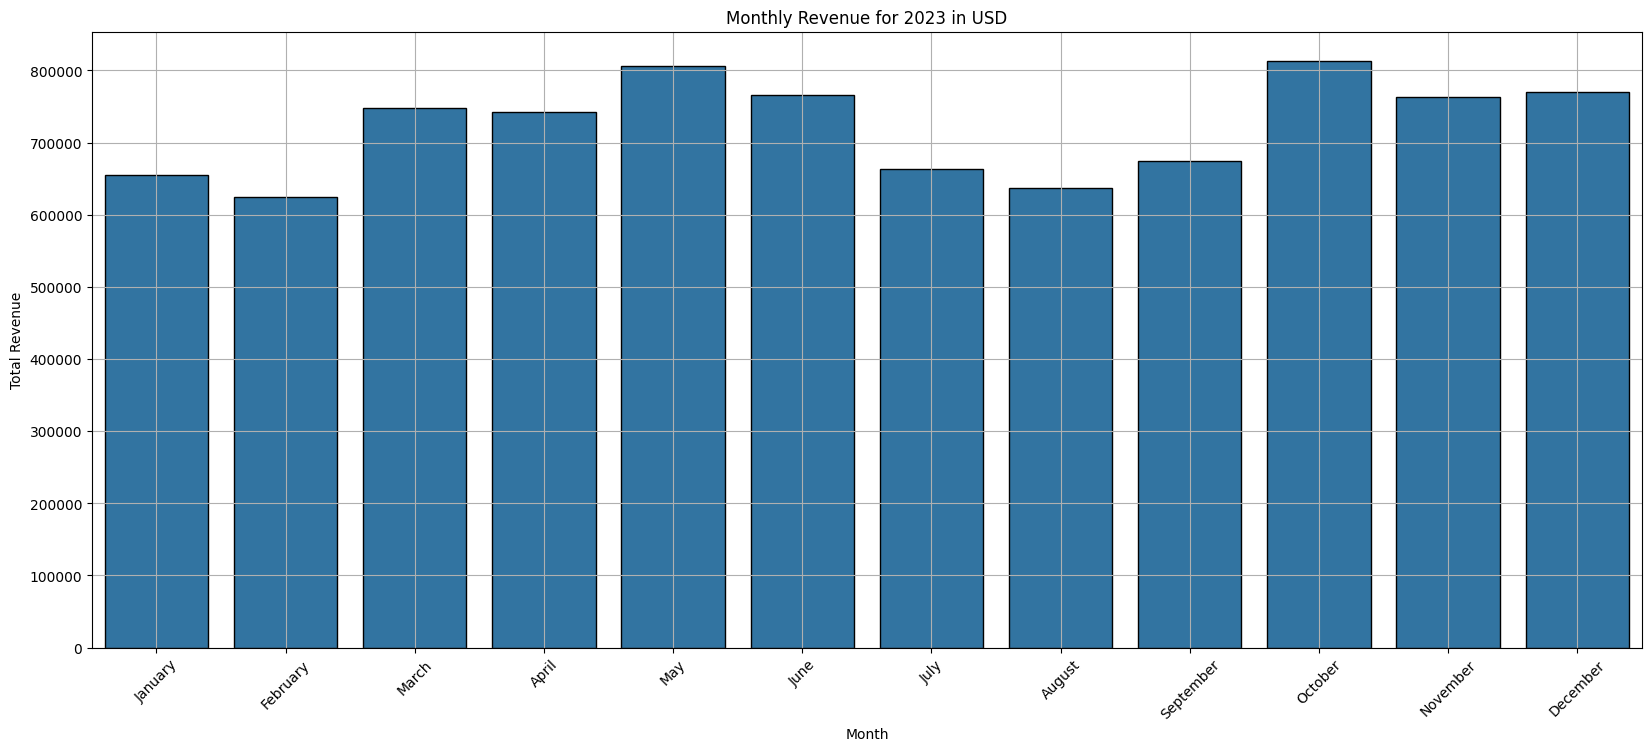

In [43]:
# Group data by month and analyse monthly revenue
plt.figure(figsize=(20,8))
monthly_revenue = df.groupby(df['tpep_pickup_datetime'].dt.month_name())['total_amount'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, edgecolor='Black')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue for 2023 in USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

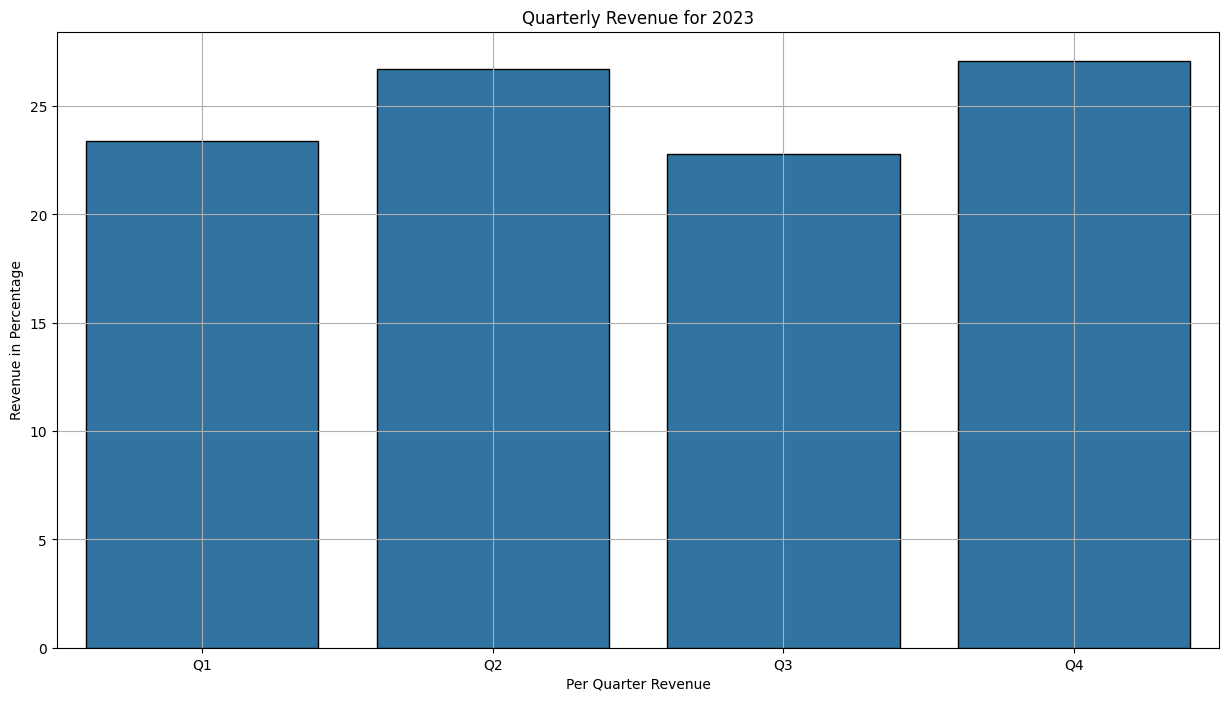

In [49]:
# Calculate proportion of each quarter
df['Quarter']=np.select([
        df['tpep_pickup_datetime'].dt.month.isin([1, 2, 3]),
        df['tpep_pickup_datetime'].dt.month.isin([4, 5, 6]),
        df['tpep_pickup_datetime'].dt.month.isin([7, 8, 9]),
        df['tpep_pickup_datetime'].dt.month.isin([10, 11, 12])],
    ['Q1', 'Q2', 'Q3', 'Q4'], default = 'Unknown')


quarterly_revenue = df.groupby('Quarter')['total_amount'].sum().round(2)
quarterly_revenue_proportion=quarterly_revenue/quarterly_revenue.sum()*100

plt.figure(figsize=(15,8))
sns.barplot(x=quarterly_revenue_proportion.index,y=quarterly_revenue_proportion.values,edgecolor='Black')
plt.xlabel("Per Quarter Revenue")
plt.ylabel("Revenue in Percentage")
plt.title("Quarterly Revenue for 2023")
plt.grid(True)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

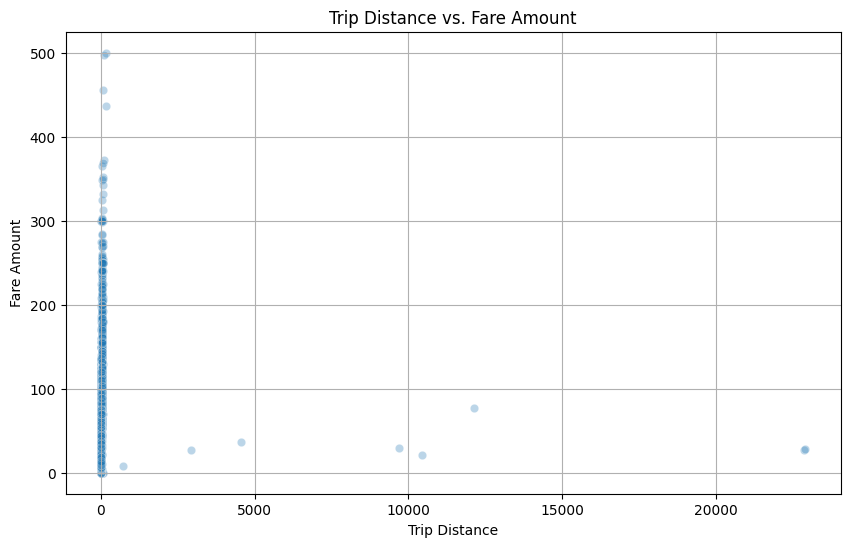

In [51]:
# Show how trip fare is affected by distance
df=df[df['trip_distance']>0]
trip_d = df['trip_distance']
fare_a= df['fare_amount']
plt.figure(figsize=(10, 6))
sns.scatterplot(x= trip_d, y= fare_a, alpha=0.3)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs. Fare Amount")
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

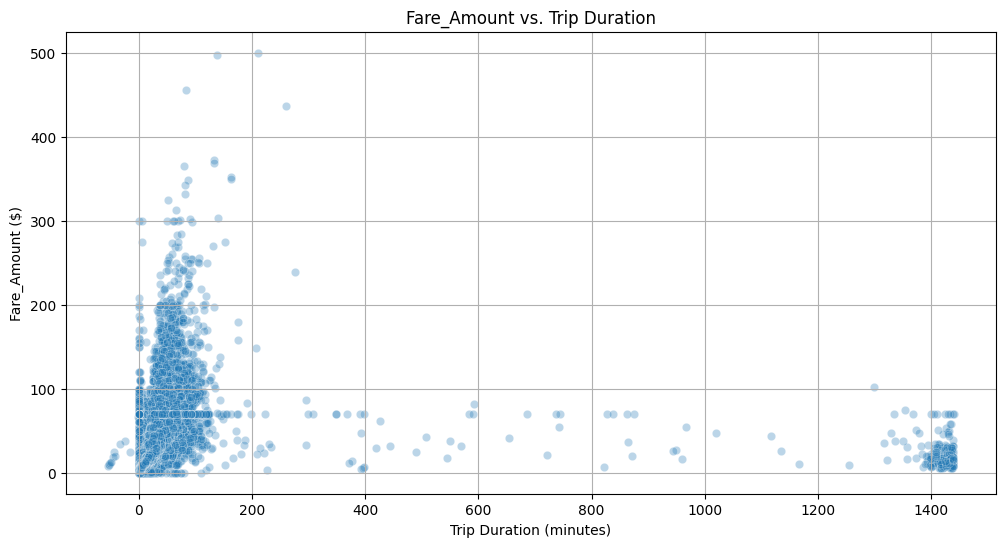

In [59]:
# Show relationship between fare and trip duration
# Convert pickup and dropoff times to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

plt.figure(figsize=(12,6))
sns.scatterplot(x=df["trip_duration"], y=df["fare_amount"], alpha=0.3)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare_Amount ($)")
plt.title("Fare_Amount vs. Trip Duration")
plt.grid(True)
plt.show()

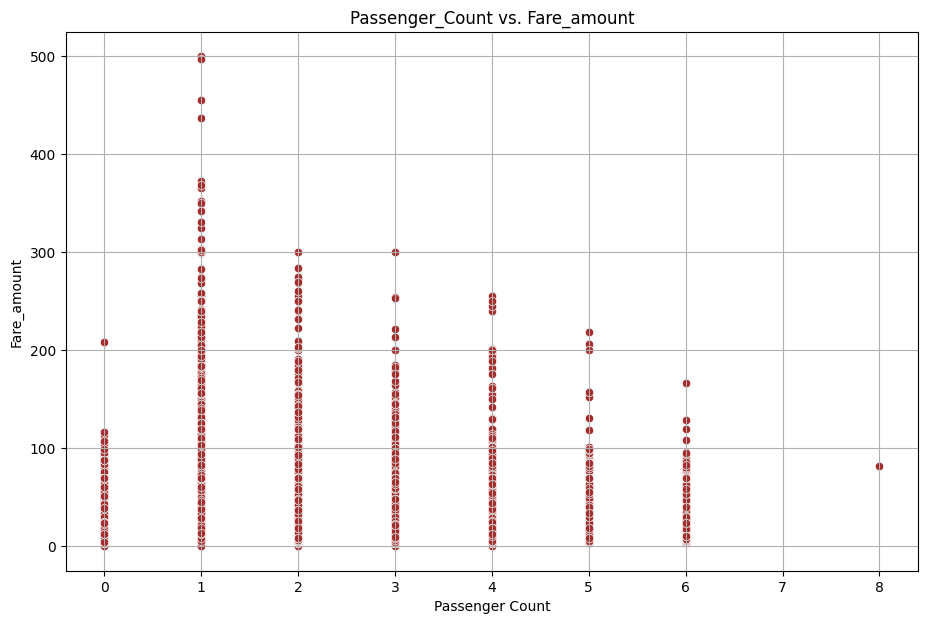

In [61]:
# Show relationship between fare and number of passengers
passenger_count = df["passenger_count"].value_counts()
passenger_count_percentage = passenger_count.sort_index()

plt.figure(figsize=(11, 7))
sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"], color='Brown')
plt.xlabel("Passenger Count")
plt.ylabel("Fare_amount")
plt.title("Passenger_Count vs. Fare_amount")
plt.grid(True)
plt.show()


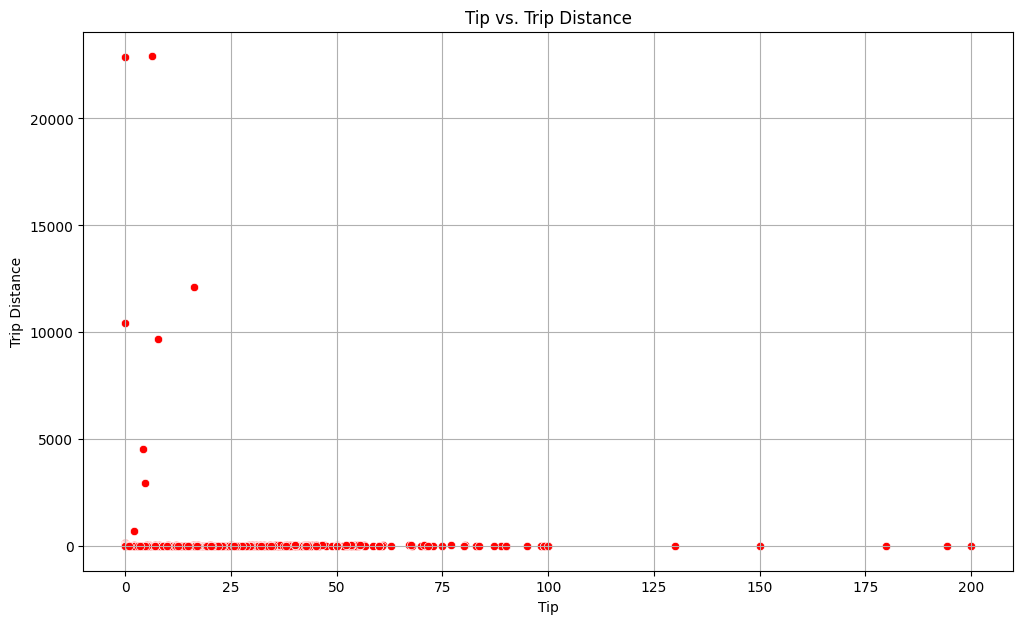

In [65]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df["tip_amount"], y=df["trip_distance"],color='red')
plt.xlabel("Tip")
plt.ylabel("Trip Distance")
plt.title("Tip vs. Trip Distance")
plt.grid(True)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

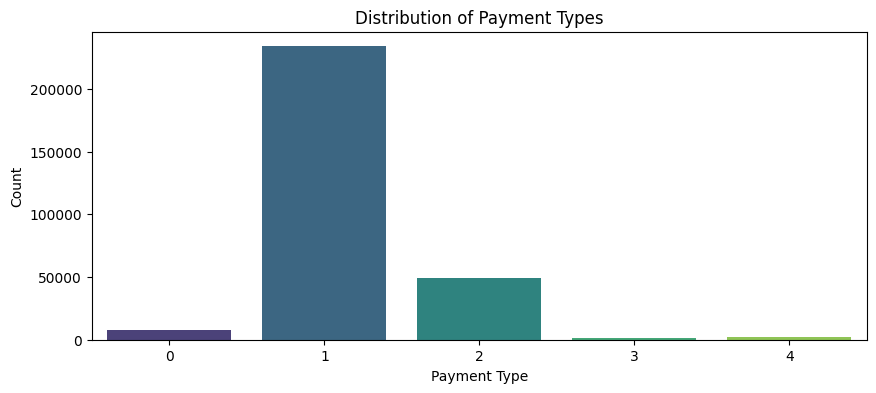

In [69]:
# Analyse the distribution of different payment types (payment_type).
payment_types = df["payment_type"].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=payment_types.index, y=payment_types.values,palette="viridis")

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [73]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [85]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\Srinivasan\EDDSAI\NYC taxi data\Datasets and Dictionary\taxi_zones")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

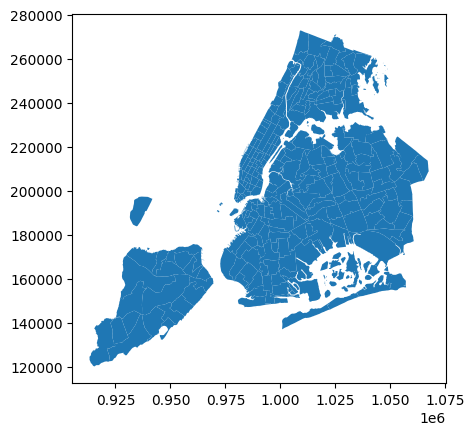

In [87]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [91]:
# Merge zones and trip records using locationID and PULocationID
df_merged = pd.merge(left = df, right = zones , left_on = 'PULocationID', right_on = 'LocationID')
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  Airport_fee  Quarter  trip_duration  OBJECTID  \
0             1  ...         0.00       Q2      12.050000        24   
1             2  ...          NaN       Q1       9.216667       186   
2             1  ...         1.25       Q1      43.966667       132   
3             1  ...         0.00       Q1      26.133333       186   
4             1  ...         0.00       Q3       9.266667       142   

   Shape_Leng  Shape_Area                          zone  LocationID  \
0    0.047000    0.000061                  Bloomingdale          24   
1    0.024696    0.000037  Penn Station/Madison Sq West         186   
2    0.245479    0.002038                   JFK Airport         132   
3    0.024696    0.000037  Penn Station/Madison Sq West         186   
4    0.038176    0.000076           Lincoln Square East         142   

     borough                                           geometry  
0  Manhattan  POLYGON ((995453.114 230274.267, 995312.583 23...  
1  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  
2     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  
4  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [93]:
# Group data by location and calculate the number of trips
Trip_no=df_merged.groupby('LocationID')['LocationID'].sum()
Trip_no

LocationID
1           10
3           21
4         1528
5           20
6           36
        ...   
259       2072
260       9100
261     408987
262    1026516
263    1489632
Name: LocationID, Length: 235, dtype: int32

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [97]:
# Merge trip counts back to the zones GeoDataFrame
zones['Trip_no'] = df_merged.groupby('LocationID')['LocationID'].count()
zones['Trip_no']

0         NaN
1        10.0
2         NaN
3         7.0
4       382.0
        ...  
258      12.0
259       8.0
260      35.0
261    1567.0
262    3918.0
Name: Trip_no, Length: 263, dtype: float64

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

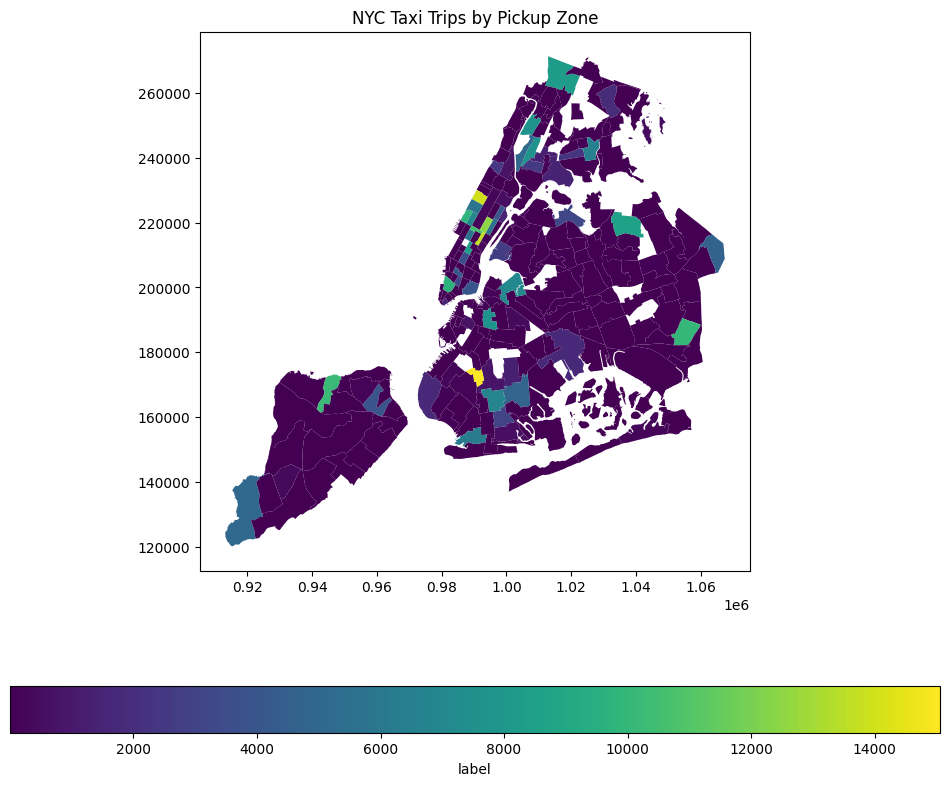

In [99]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones.plot(column = 'Trip_no',ax = ax,legend = True,legend_kwds = {'label': "label", 'orientation': "horizontal"})  # Use the defined axis
ax.set_title("NYC Taxi Trips by Pickup Zone", )
plt.show()

In [133]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted_by_trips =   df_merged.groupby('zone').size().reset_index().sort_values(by =0 , ascending = False)
zones_sorted_by_trips

zone      0
110                JFK Airport  15059
211      Upper East Side South  13947
141             Midtown Center  13678
210      Upper East Side North  12522
142               Midtown East  10513
..                         ...    ...
11     Bay Terrace/Fort Totten      1
109           Inwood Hill Park      1
85   Forest Park/Highland Park      1
181          Rossville/Woodrow      1
97         Grymes Hill/Clifton      1

[235 rows x 2 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [141]:
# Find routes which have the slowest speeds at different times of the day
df_merged['speed_mph']=df_merged["trip_distance"] / df_merged["trip_duration"]
slow_routes = df_merged.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_speed_mph=("speed_mph", "mean"),
    avg_trip_time=("trip_duration", "mean"))
slow_routes = slow_routes[slow_routes['avg_speed_mph']>0]
slow_routes.sort_values(by='avg_speed_mph',ascending=True).head()

avg_speed_mph  avg_trip_time
PULocationID DOLocationID pickup_hour                              
194          194          15                0.000046     875.583333
151          24           1                 0.000355    1435.833333
43           10           10                0.000371      53.966667
113          235          22                0.000802     349.233333
194          194          16                0.000815      12.266667

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

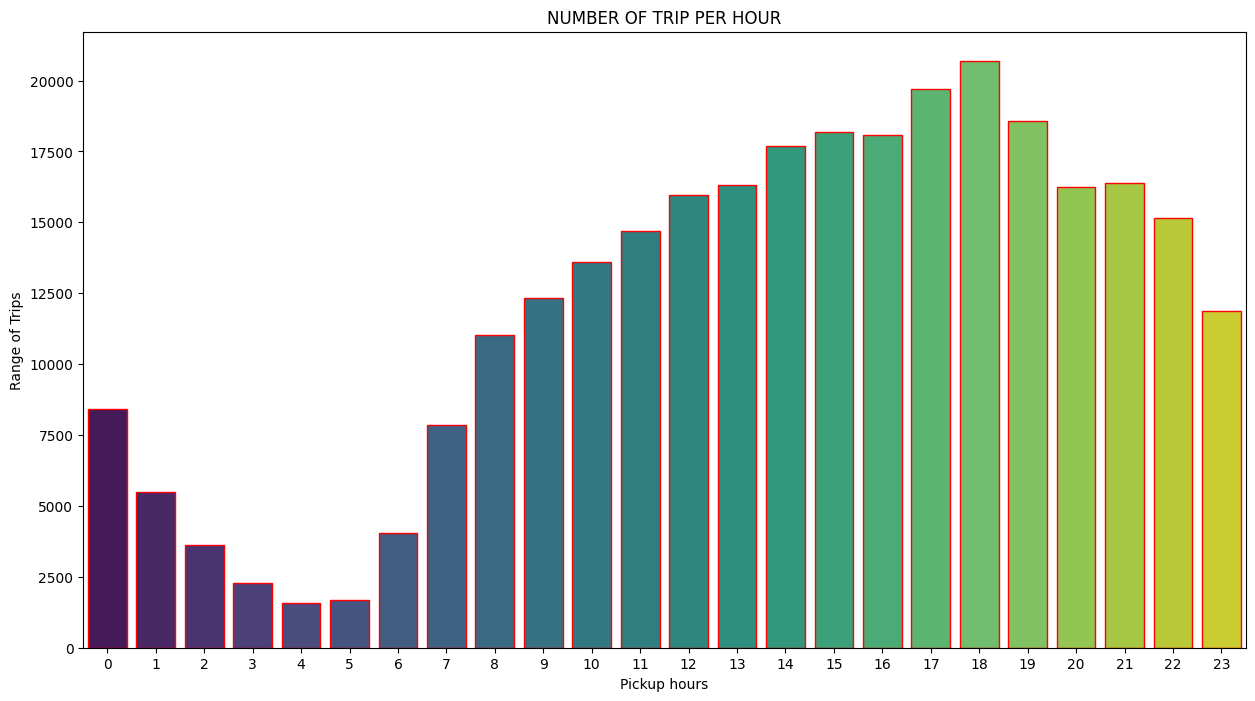

In [167]:
# Visualise the number of trips per hour and find the busiest hour
busiest_hours=df_merged.pickup_hour.value_counts()
plt.figure(figsize = (15,8))
sns.barplot(x = busiest_hours.index , y = busiest_hours.values, palette = 'viridis', edgecolor ='red')
plt.xlabel('Pickup hours')
plt.ylabel('Range of Trips')
plt.title('NUMBER OF TRIP PER HOUR')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [169]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =100/0.86
scaled_up_count=busiest_hours*sample_fraction
scaled_up_count.sort_values(ascending=False).astype(int).head()

pickup_hour
18    2405348
17    2290930
19    2158720
15    2113720
16    2102674
Name: count, dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [171]:
# Compare traffic trends for the week days and weekends
df_merged['day_name'] = pd.to_datetime(df_merged['tpep_pickup_datetime']).dt.day_name()
weekday_mapping={'Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday','Thursday':'Weekday','Friday':'Weekday','Saturday':'Weekend','Sunday':'Weekend'}
df_merged['week_day_type']=df_merged['day_name'].map(weekday_mapping)
weekly_traffic=df_merged.groupby(['week_day_type','pickup_hour']).size().reset_index(name='trip_count')
weekly_traffic.head()

week_day_type  pickup_hour  trip_count
0       Weekday            0        4190
1       Weekday            1        2057
2       Weekday            2        1107
3       Weekday            3         683
4       Weekday            4         696

In [173]:
#we are applying pivot function
traffic_pivot = weekly_traffic.pivot(index='pickup_hour', columns='week_day_type', values='trip_count')
traffic_pivot.head()

week_day_type  Weekday  Weekend
pickup_hour                    
0                 4190     4234
1                 2057     3446
2                 1107     2507
3                  683     1616
4                  696      895

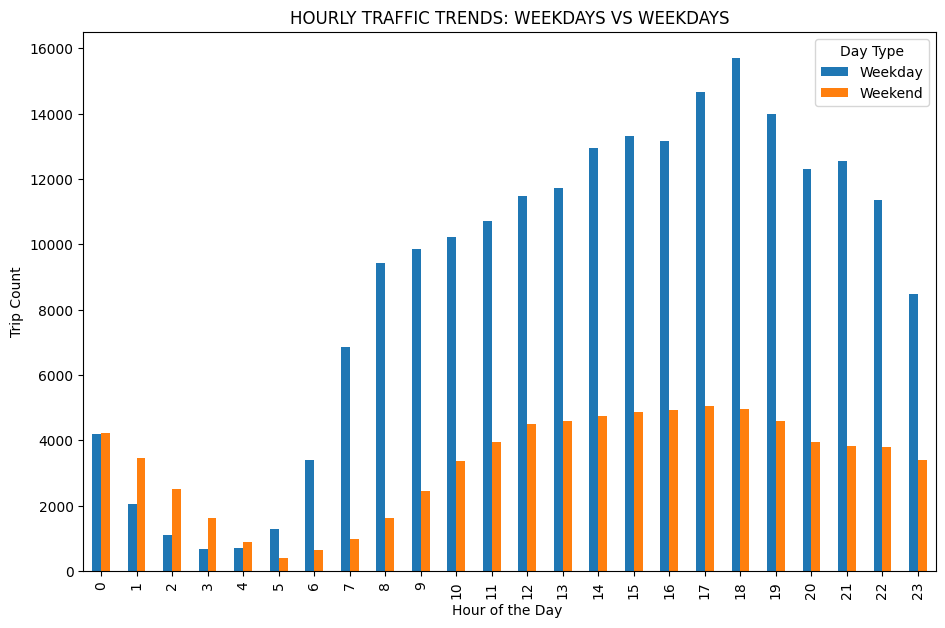

In [179]:
#Visualising the above data
traffic_pivot.plot.bar(figsize=(11, 7))
plt.xlabel('Hour of the Day ')
plt.ylabel('Trip Count')
plt.title("HOURLY TRAFFIC TRENDS: WEEKDAYS VS WEEKDAYS")
plt.legend(title="Day Type")
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [221]:
# Find top 10 pickup and dropoff zones
# Merge DataFrames correctly
df_merged_2 = pd.merge(left=df, right=zones, left_on="DOLocationID", right_on="LocationID")

# Ensure datetime conversion happens on the merged dataset
df_merged_2["pickup_hour"] = pd.to_datetime(df_merged_2["tpep_pickup_datetime"]).dt.hour
df_merged_2["dropoff_hour"] = pd.to_datetime(df_merged_2["tpep_dropoff_datetime"]).dt.hour

# Group by pickup and dropoff zones to find top locations
top_pickup_zones = df_merged_2.groupby("pickup_hour")["pickup_hour"].count().nlargest(10)
top_dropoff_zones = df_merged_2.groupby("pickup_hour")["dropoff_hour"].count().nlargest(10)

print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)

Top 10 Pickup Zones:
 pickup_hour
18    20607
17    19635
19    18484
15    18122
16    17992
14    17652
21    16304
13    16273
20    16191
12    15918
Name: pickup_hour, dtype: int64

Top 10 Dropoff Zones:
 dropoff_hour
18    21233
19    19576
17    19345
16    18095
15    17991
14    16789
20    16513
21    16282
13    15992
12    15565
Name: dropoff_hour, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

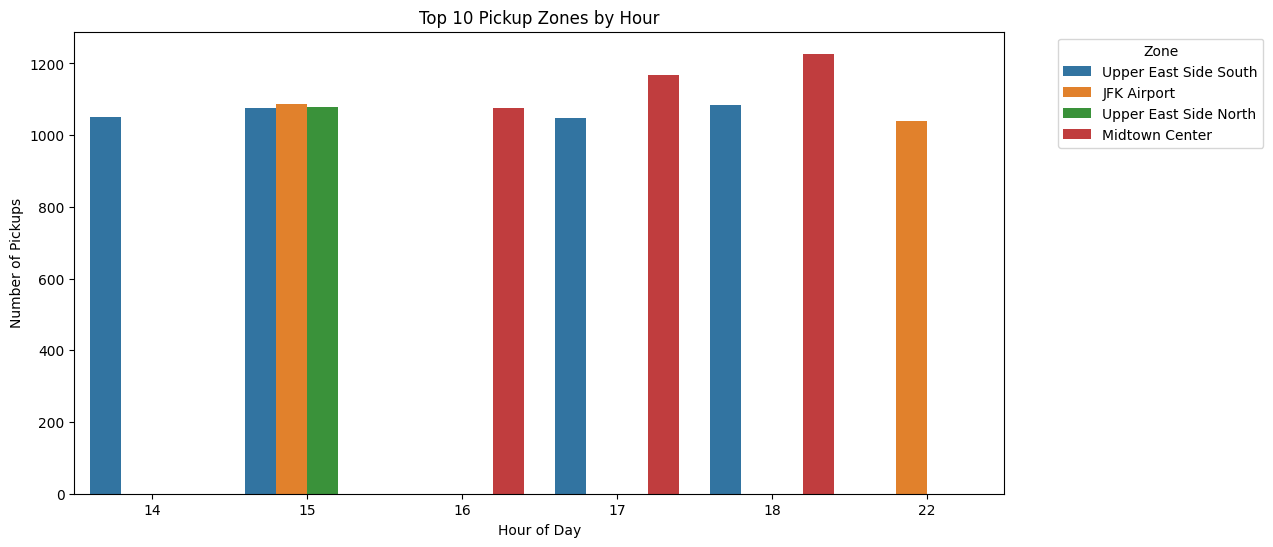

In [326]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_dropoff_zones, x='pickup_hour', y='pickup_count', hue='zone')
plt.title("Top 10 Pickup Zones by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

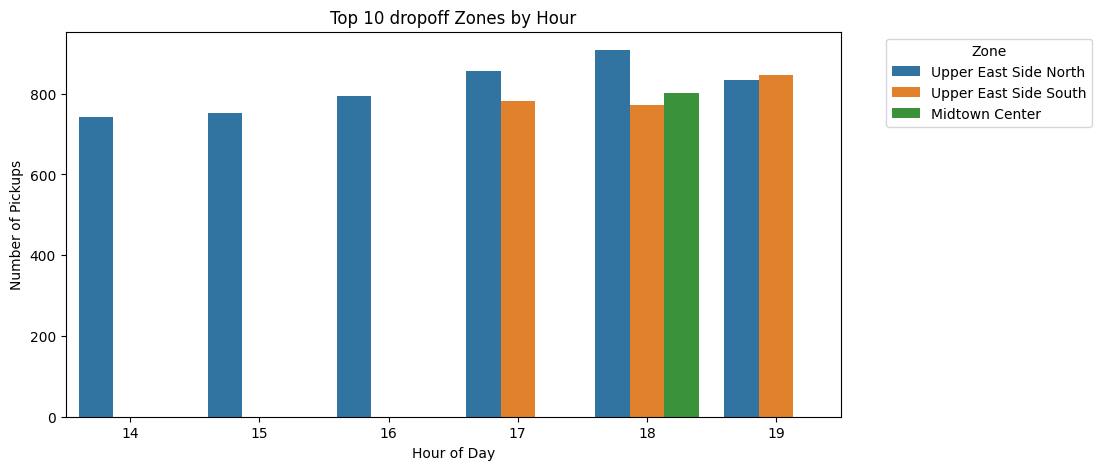

In [334]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_dropoff_zones, x='dropoff_hour', y='dropoff_count', hue='zone')
plt.title("Top 10 dropoff Zones by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [233]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_1= df_merged[(df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)]
night_hours_2=df_merged_2[(df_merged['pickup_hour']>=23) | (df_merged_2['pickup_hour']<=5)]

night_pickup_counts = (night_hours_1.groupby(['pickup_hour', 'zone'])
                       .size()
                       .reset_index(name='night_pickups')
                       .sort_values(by='night_pickups', ascending=False))



night_dropoff_counts = (night_hours_2.groupby(['dropoff_hour', 'zone'])
                        .size()
                        .reset_index(name='night_dropoffs')
                        .sort_values(by='night_dropoffs', ascending=False))

top_10_night_pickups = night_pickup_counts
top_10_night_dropoffs = night_dropoff_counts
top_10_night_pickups.head(10)

pickup_hour                       zone  night_pickups
684           23                JFK Airport            987
46             0                JFK Airport            634
28             0               East Village            586
689           23          LaGuardia Airport            586
740           23               West Village            559
664           23               East Village            549
130            1               East Village            525
726           23  Times Sq/Theatre District            515
99             0               West Village            508
652           23               Clinton East            472

In [235]:
top_10_night_dropoffs.head(10)

dropoff_hour          zone  night_dropoffs
54              0  East Village             301
253             1  East Village             280
75              0      Gramercy             216
125             0   Murray Hill             210
32              0  Clinton East             209
227             1  Clinton East             201
440             2  East Village             197
379             1  West Village             193
273             1      Gramercy             192
184             0  West Village             182

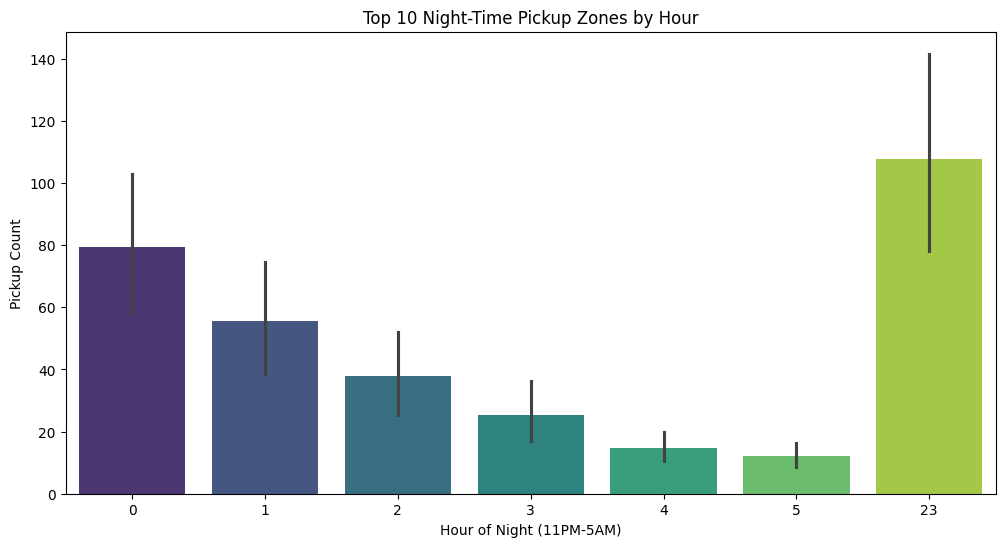

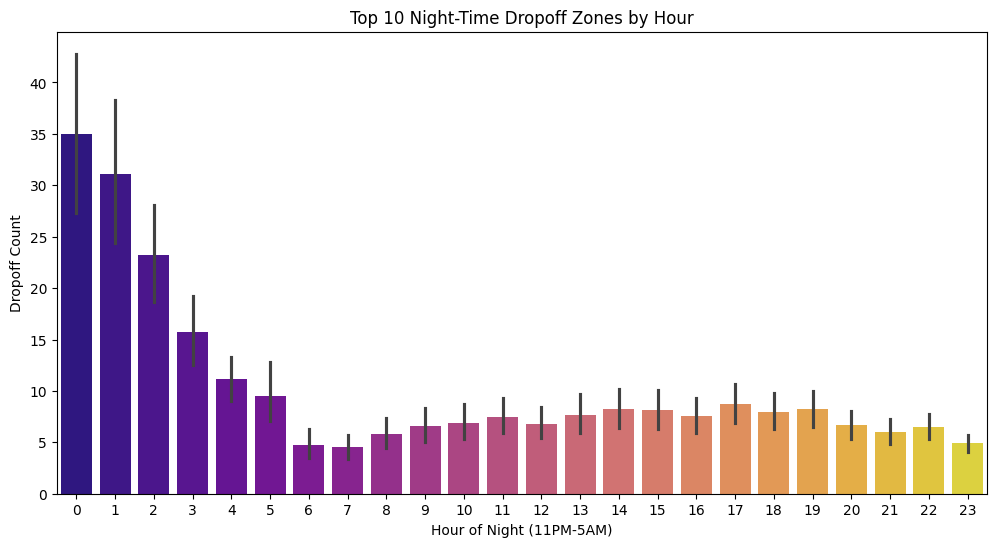

In [251]:
#Visualising the above data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_night_pickups, x='pickup_hour', y='night_pickups', palette='viridis')
plt.xlabel("Hour of Night (11PM-5AM)")
plt.ylabel("Pickup Count")
plt.title("Top 10 Night-Time Pickup Zones by Hour")
plt.show()

# Plot dropoffs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_night_dropoffs, x='dropoff_hour', y='night_dropoffs', palette='plasma')
plt.xlabel("Hour of Night (11PM-5AM)")
plt.ylabel("Dropoff Count")
plt.title("Top 10 Night-Time Dropoff Zones by Hour")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [254]:
# Filter for night hours (11 PM to 5 AM)
night_hours = df_merged[(df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)]
day_hours = df_merged[(df_merged['pickup_hour'] >= 6) & (df_merged['pickup_hour'] <= 22)]

#Finding revenue
night_revenue = night_hours['total_amount'].sum()
day_revenue = day_hours['total_amount'].sum()

night_revenue
day_revenue

7365392.96

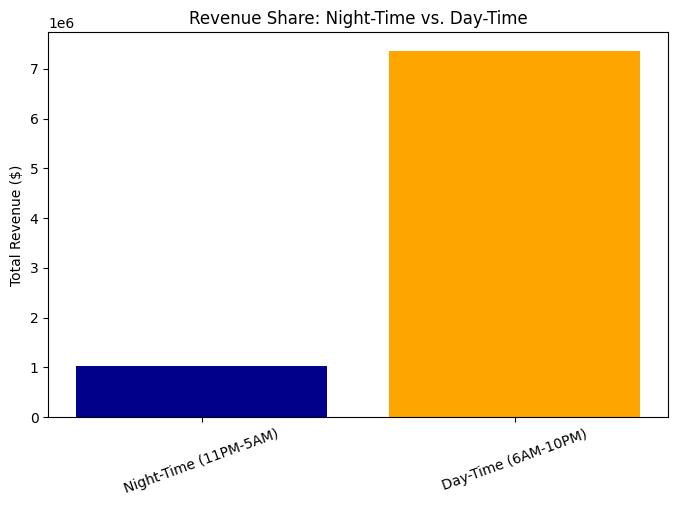

In [256]:
#Visualising the abive data
labels = ['Night-Time (11PM-5AM)', 'Day-Time (6AM-10PM)']
revenues = [night_revenue, day_revenue]

# Creating bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, revenues, color=['darkblue', 'orange'])
plt.ylabel("Total Revenue ($)")
plt.title("Revenue Share: Night-Time vs. Day-Time")
plt.xticks(rotation=20)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [268]:
# Analyse the fare per mile per passenger for different passenger counts
# Analyse the fare per mile per passenger for different passenger counts

df= df_merged[(df_merged['trip_distance'] > 0) & (df_merged['passenger_count'] > 0)]

df['fare_per_mile'] = df_merged3['total_amount'] / df_merged3['trip_distance']
df['fare_per_mile_per_passenger'] = df_merged3['fare_per_mile'] / df_merged3['passenger_count']

fare_analysis = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

fare_analysis

passenger_count
1.0    16.523772
2.0     9.854746
3.0     6.397754
4.0     5.290813
5.0     2.799590
6.0     2.180663
8.0     0.692591
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

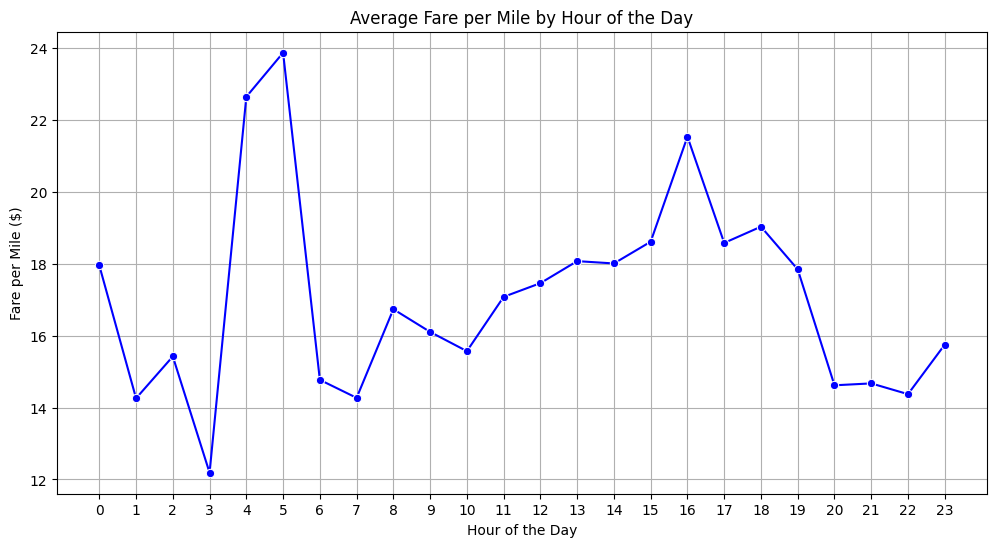

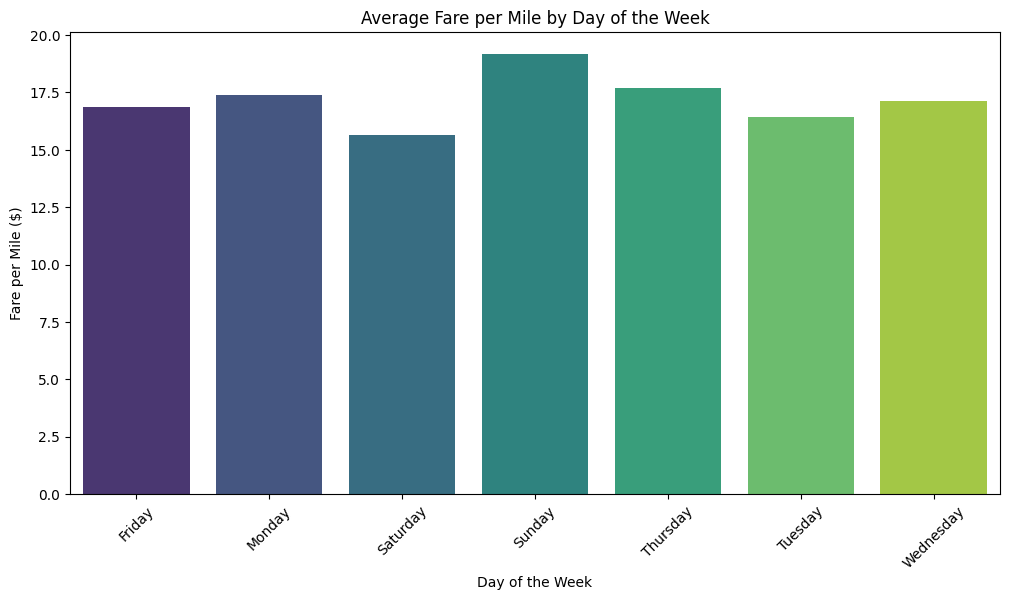

In [260]:
# Compare the average fare per mile for different days and for different times of the day
fare_per_mile_by_hour = df_merged3.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()
fare_per_mile_by_day = df_merged3.groupby("day_name")["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=fare_per_mile_by_hour, x="pickup_hour", y="fare_per_mile", marker="o", color="b")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fare per Mile ($)")
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

# Plot by Day of the Week
plt.figure(figsize=(12,6))
sns.barplot(data=fare_per_mile_by_day, x="day_name", y="fare_per_mile", palette="viridis")
plt.title("Average Fare per Mile by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

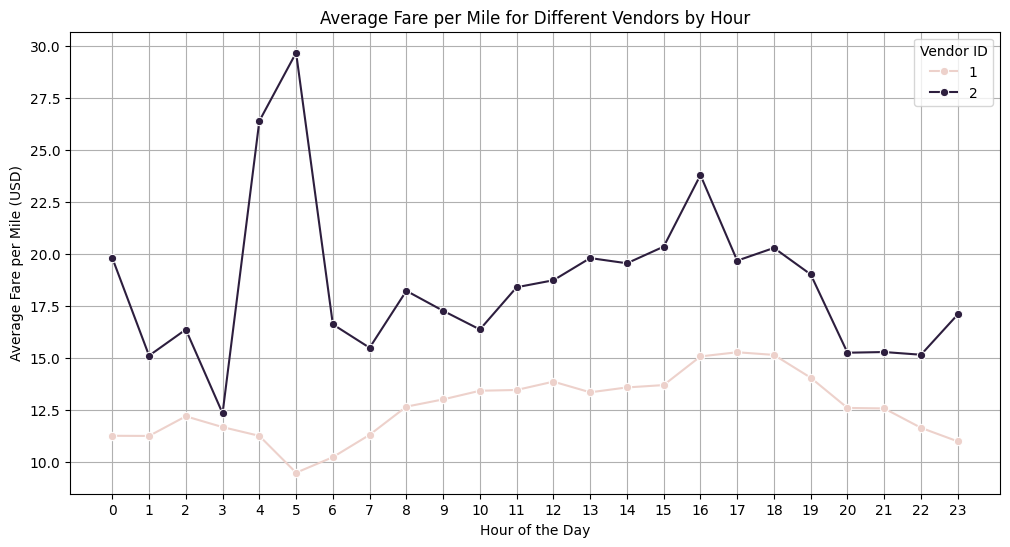

In [264]:
# Compare fare per mile for different vendors
vendor_fare_analysis = df_merged3.groupby(["VendorID", "pickup_hour"]).agg(
    avg_fare_per_mile=("fare_per_mile", "mean")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_fare_analysis, x="pickup_hour", y="avg_fare_per_mile", hue="VendorID", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile for Different Vendors by Hour")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [276]:
# Defining distance tiers
conditions = [
    (df["trip_distance"] <= 2),
    (df["trip_distance"] > 2) & (df["trip_distance"] <= 5),
    (df["trip_distance"] > 5)]

tier_labels = ["0-2 miles", "2-5 miles", "5+ miles"]
df["distance_tier"] = np.select(conditions, tier_labels,default ='')
#Analysing the results of different vendors as per distance
vendor_fare_tiers = df.groupby(["VendorID", "distance_tier"]).agg(
    avg_fare_per_mile=("fare_per_mile", "mean")
).reset_index()

# Display the first few rows
print(vendor_fare_tiers)

   VendorID distance_tier  avg_fare_per_mile
0         1     0-2 miles          17.166287
1         1     2-5 miles           9.174138
2         1      5+ miles           5.957575
3         2     0-2 miles          26.929977
4         2     2-5 miles           9.495363
5         2      5+ miles           6.168638


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [278]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100
tip_by_distance = df.groupby("distance_tier")["tip_percentage"].mean().reset_index()
tip_by_passengers = df.groupby("passenger_count")["tip_percentage"].mean().reset_index()
tip_by_hour = df.groupby("pickup_hour")["tip_percentage"].mean().reset_index()

In [280]:
tip_by_distance

distance_tier  tip_percentage
0     0-2 miles       22.416599
1     2-5 miles       18.848440
2      5+ miles             inf

In [282]:
tip_by_passengers

passenger_count  tip_percentage
0              1.0       20.702502
1              2.0             inf
2              3.0       19.181796
3              4.0       17.551809
4              5.0       20.673771
5              6.0       20.541593
6              8.0       18.292683

In [284]:
tip_by_hour

pickup_hour  tip_percentage
0             0       20.222940
1             1       20.527062
2             2       21.075563
3             3       20.396879
4             4       18.152160
5             5       17.071014
6             6       18.719241
7             7       19.678459
8             8       20.171804
9             9       19.805362
10           10       19.281756
11           11       18.985124
12           12       19.096890
13           13       18.924683
14           14       19.074816
15           15       19.087499
16           16             inf
17           17       21.709871
18           18       22.215049
19           19       22.114379
20           20       21.516970
21           21       21.656871
22           22       21.252739
23           23       20.866635

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

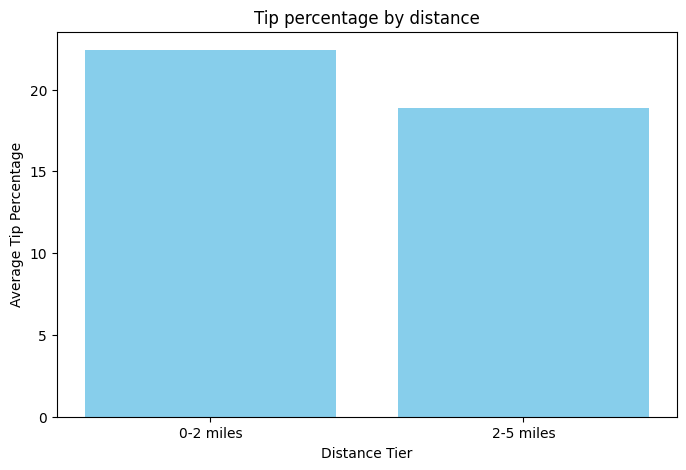

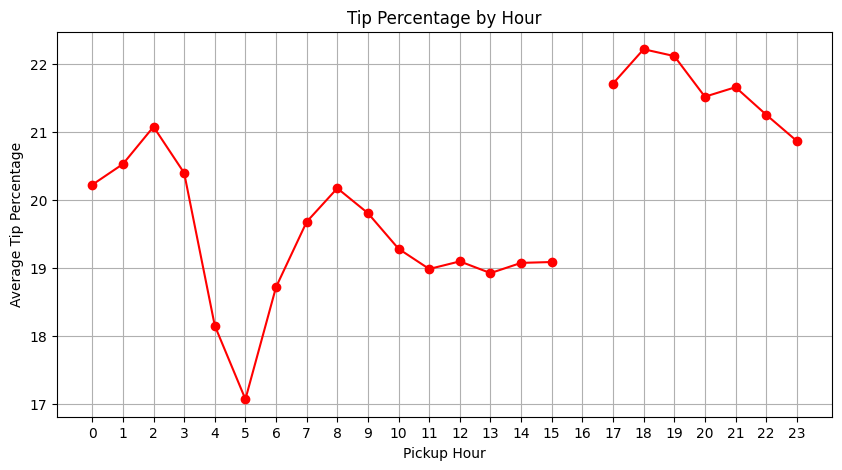

In [288]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
plt.figure(figsize=(8,5))
plt.bar(tip_by_distance["distance_tier"], tip_by_distance["tip_percentage"], color='skyblue')
plt.xlabel("Distance Tier")
plt.ylabel("Average Tip Percentage")
plt.title("Tip percentage by distance")
plt.show()

# Tip Percentage by Hour
plt.figure(figsize=(10,5))
plt.plot(tip_by_hour["pickup_hour"], tip_by_hour["tip_percentage"], marker="o", color="red")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Hour")
plt.xticks(range(0,24))
plt.grid()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

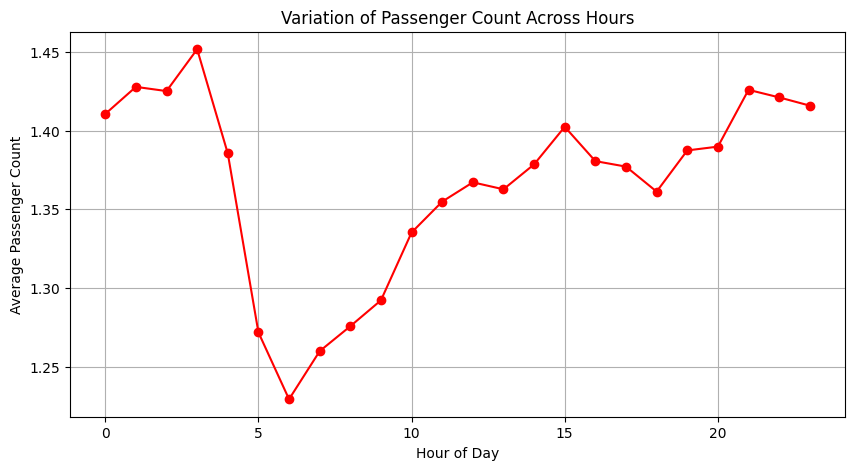

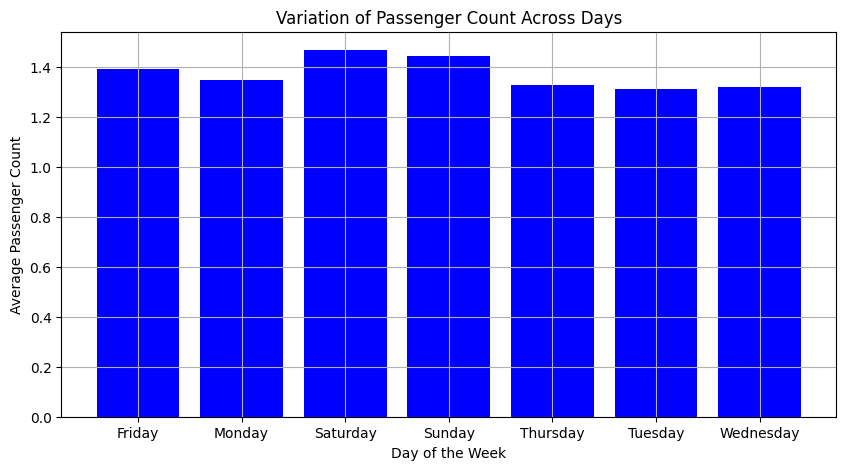

In [292]:
# See how passenger count varies across hours and days
hourly_passenger_count = df_merged.groupby("pickup_hour")["passenger_count"].mean()
plt.figure(figsize=(10, 5))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Hours")
plt.grid()
plt.show()

daily_passenger_count = df_merged.groupby("day_name")["passenger_count"].mean()

plt.figure(figsize=(10, 5))
plt.bar(daily_passenger_count.index, daily_passenger_count.values, color="blue")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Days")
plt.grid()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
Peak Zones: Focus on ensuring more vehicles are available during high-demand periods in high-traffic zones (CBDs, tourist hubs, transportation centers) to meet increased passenger demand.

Low-Demand Zones: Consider repositioning vehicles to boost demand in these areas during off-peak hours. Incentivize rides or implement discounted fares to make these zones more attractive for passengers.

Event-Driven Surges: Use predictive analytics to anticipate events or seasonal peaks (festivals, holidays, conventions) in specific zones and allocate resources accordingly.

In [13]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate the average passenger count for each zone by grouping by the zone and calculating the mean of the 'passenger_count' column.
df['average_passenger_count'] = df.groupby('zone')['passenger_count'].transform('mean')

# Display the updated GeoDataFrame to verify the new column
df[['zone', 'average_passenger_count']].head()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [17]:
# How often is each surcharge applied?
df['surcharge'].value_counts()
 

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1. Demand-Aware Routing
Use historical trip data to forecast demand hotspots at different times of day and days of the week.

Implement predictive dispatch systems that reposition idle vehicles to zones with high expected demand before peaks occur (e.g., Midtown during evenings, airports during weekends).

Prioritize zone-based clustering of rides to reduce dead mileage and improve route density.

2. Dynamic, Real-Time Dispatching
Deploy AI-driven dispatch algorithms that adjust driver assignments in real time based on:

Live traffic conditions

Current demand surges

Closest available vehicle with optimal route

Enable dynamic zone rebalancing to avoid oversupply in certain areas while others experience shortages.

3. Reduce Idle Time and Deadhead Miles
Create a routing engine that accounts for backhaul opportunities—identify zones with consistent one-way traffic and incentivize return trips to reduce empty rides.

Schedule intermittent zone rotation for drivers to balance workload and reposition vehicles efficiently.

4. Zone-Specific Resource Allocation
Allocate more vehicles to high-demand zones during peak periods (e.g., Upper East Side, Midtown Center between 1 PM – 9 PM).

During low-demand periods, scale down dispatching in underperforming zones to cut costs and reassign resources. 
    
5. Time-of-Day Routing Rules
Morning (6–10 AM): Emphasize routing from residential zones to commercial districts.

Evening (5–9 PM): Reverse flows to focus on CBD to residential areas.

Integrate time-based priority routing to anticipate common ride directions and reduce delays.
 6. Smart Pooling Optimization
Use trip-matching algorithms that identify overlapping routes in real time to group passengers.

Reduce trip redundancy while increasing per-mile vehicle efficiency in dense zones.

7. Route Heatmapping and Learning Loops
Continuously analyze trip heatmaps and drop-off patterns to refine routing models weekly.

Establish a feedback loop: driver input + system data → refined dispatch strategies.

8. Multi-Modal Integration (Optional)
For last-mile services, coordinate dispatch around public transport hubs, allowing seamless transitions for passengers and increasing demand near stations.
 Expected Outcomes
Up to 20–30% reduction in idle time and fuel usage

Improved driver earnings via better trip stacking and reduced downtime

Higher customer satisfaction due to reduced wait and trip times

Balanced fleet distribution, even in fluctuating demand environments


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Strategic Cab Positioning Recommendations
🕒 1. Time-of-Day Based Positioning
Time of Day	Suggested Zones	Rationale
Morning (6 AM – 10 AM)	Residential neighborhoods ➝ Business hubs (e.g., Upper East Side, Midtown Center)	Commuter traffic from home to work and school zones.
Midday (10 AM – 2 PM)	Commercial zones, hospitals, shopping districts	Moderate trip volume from errands, appointments, and lunch outings.
Afternoon (2 PM – 5 PM)	Schools, downtown areas	School pickups and early return-home trips.
Evening (5 PM – 9 PM)	Midtown, Times Square, entertainment areas	High demand for post-work commutes and leisure travel.
Late Night (9 PM – 2 AM)	Nightlife zones, transport hubs (airports/train stations)	Bar, event, and airport departures dominate late-night traffic.
 2. Day-of-Week Based Positioning
Day	High-Demand Zones	Positioning Strategy
Monday–Thursday	Business districts, transit zones	Prioritize morning and evening commute corridors.
Friday	Offices (AM), Entertainment zones (PM)	Dual-positioning: Office routes early; nightlife hubs later.
Saturday	Tourist spots, malls, parks, events	Focus on leisure travel areas and event venues.
Sunday	Airports, intercity stations, residential return zones	Position cabs for return-trip demand and late travelers.
3. Monthly/Seasonal Positioning Strategy
Season/Month	Key Zones	Demand Trends
Winter (Dec–Feb)	Residential areas, shopping centers, transit hubs	More cab usage due to cold weather; indoor destinations rise.
Spring (Mar–May)	Parks, museums, tourist zones	Warmer weather increases movement across outdoor areas.
Summer (Jun–Aug)	Airports, tourist attractions, beach areas	Travel, vacations, and tourist activity spike.
Fall (Sep–Nov)	Office districts, schools, universities	Commute and academic travel increase.
4. Zone-Based Prioritization Model
Zone Tiers Based on Demand Volume:

Tier 1 (High Demand): Midtown Center, Times Square, Upper East Side South/North.

Tier 2 (Moderate Demand): SoHo, East Village, financial district fringe areas.

Tier 3 (Low Demand): Outer residential zones, industrial fringes.
Benefits of Strategic Cab Positioning
Improves ride availability in critical time/location windows.

Minimizes dead mileage and reduces idle time.

Enhances driver earnings through better trip stacking.

Increases passenger satisfaction via reduced wait times.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Customer Segmentation & Personalized Pricing
Leverage historical and behavioral data to group customers by usage patterns, frequency, and price sensitivity:

Frequent Riders: Offer loyalty discounts, ride bundles, or monthly subscription plans to retain high-value users.

Occasional Riders: Provide time-limited promotions or referral bonuses to increase usage frequency.

Price-Sensitive Riders: Offer off-peak or zone-specific discounts to stimulate demand in low-usage periods or areas.

Premium Users: Introduce a higher-tier service with guaranteed availability, priority pickups, and premium vehicles.

2. Time-Based Dynamic Pricing
Use demand analytics to implement flexible time-based fare adjustments:

Peak Hours (e.g., 5–9 PM weekdays, 11 PM–2 AM weekends):

Increase base fare and per-mile rates by a variable percentage (e.g., +15–30%) to capture high demand.

Off-Peak Periods (e.g., 10 AM–3 PM weekdays):

Offer reduced fares or flat discounts to boost ride volume and fleet utilization.

Event-Sensitive Pricing:

Dynamically raise fares around concerts, sports games, and city festivals using real-time demand spikes.
    3. Zone-Based Price Optimization
Use geographic data to fine-tune fares by location:

High-Demand Zones (e.g., Midtown, Airports, Nightlife Areas):

Apply zone-specific surge pricing during known rush periods.

Low-Demand Zones:

Offer discounted fares or “return fare” incentives to encourage drivers and passengers into these areas.
 4. Competitive Price Monitoring & Adaptive Benchmarking
Use price intelligence tools to track fare structures of leading competitors in real time.

Automatically adjust prices within a defined range to stay competitive without undercutting profitability.

Introduce temporary fare drops in zones or segments where competitors gain traction, followed by targeted promotions.

5. Distance & Trip Duration Pricing Adjustments
Short Trips (≤ 2 miles):

Keep prices competitive; introduce “microtrip” promotions to attract users who might otherwise walk or use micromobility options.

Medium Trips (2–5 miles):

Slight fare increases justified by consistent high demand; emphasize reliability and safety.

Long Trips (> 5 miles):

Tiered pricing with small surcharges beyond 5 miles to maximize revenue while remaining lower than flat-rate competitors.
 6. Fixed & Promotional Pricing for Key Corridors
Flat-Rate Airport Rides:

JFK ➝ Manhattan: $55

LaGuardia ➝ Manhattan: $40

Return Trip Discounts:

Encourage round-trip bookings with 10–15% off the return leg to increase revenue per customer lifecycle.
7. Fare Enhancements & Driver Earnings Boosters
Introduce pre-set tipping suggestions in the app (e.g., 15%, 18%, 20%) to increase driver income without increasing base fare.

Promote shared rides with fixed per-passenger pricing to improve ride efficiency while keeping costs low for users.
                               
Benefits of This Approach
Revenue Growth: Through better fare segmentation, peak-time premium pricing, and long-distance adjustments.

Customer Retention: Competitive pricing and tailored offers for each user group.

Driver Satisfaction: More earnings during surge times, better ride matching, and higher tipping potential.

Fleet Efficiency: Balanced distribution of rides during low-demand windows and in less-trafficked areas.